In [149]:
# Imports
import numpy as np
import pandas as pd
import yfinance as yf
import hvplot.pandas
import plotly.graph_objs as go
from newsapi.newsapi_client import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from pathlib import Path
import os
from datetime import datetime, timedelta
import pandas as pd
import mplfinance as mpf

In [150]:
#pull data from yahoo finance
data =yf.download(tickers='AMZN', period='max', interval = '1d', start='2007-01-01')

[*********************100%***********************]  1 of 1 completed


In [151]:
# Show Data
print(data)

                   Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-01-03    38.680000    39.060001    38.049999    38.700001    38.700001   
2007-01-04    38.590000    39.139999    38.259998    38.900002    38.900002   
2007-01-05    38.720001    38.790001    37.599998    38.369999    38.369999   
2007-01-08    38.220001    38.310001    37.169998    37.500000    37.500000   
2007-01-09    37.599998    38.060001    37.340000    37.779999    37.779999   
...                 ...          ...          ...          ...          ...   
2021-07-22  3587.229980  3640.020020  3582.270020  3638.030029  3638.030029   
2021-07-23  3640.000000  3666.110107  3622.040039  3656.639893  3656.639893   
2021-07-26  3673.169922  3712.080078  3647.250000  3699.820068  3699.820068   
2021-07-27  3698.500000  3698.500000  3586.149902  3626.389893  3626.389893   
2021-07-28  3633.780029  3657.889893  3601.000000  3

In [152]:
# build dataframe

AMZN_df = pd.DataFrame(data)
AMZN_df.head(10)

# change df to csv
AMZN_csv = AMZN_df.to_csv('/users/manu/desktop/project_2/AMZN_csv', index=True)

#Show the df
AMZN_df.head(10)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-01-03,38.680000,39.060001,38.049999,38.700001,38.700001,12405100
2007-01-04,38.590000,39.139999,38.259998,38.900002,38.900002,6318400
2007-01-05,38.720001,38.790001,37.599998,38.369999,38.369999,6619700
2007-01-08,38.220001,38.310001,37.169998,37.500000,37.500000,6783000
2007-01-09,37.599998,38.060001,37.340000,37.779999,37.779999,5703000
2007-01-10,37.490002,37.700001,37.070000,37.150002,37.150002,6527500
2007-01-11,37.169998,38.000000,37.169998,37.400002,37.400002,6465600
2007-01-12,37.360001,38.209999,37.270000,38.200001,38.200001,4466400
2007-01-16,38.400002,38.889999,37.970001,38.660000,38.660000,5643700


In [153]:
#Show Close Only
AMZN_close = AMZN_df.drop(columns =['Open','High','Low','Adj Close','Volume'])
AMZN_close.head(10)

,Close
Date,
2007-01-03,38.700001
2007-01-04,38.900002
2007-01-05,38.369999
2007-01-08,37.500000
2007-01-09,37.779999
2007-01-10,37.150002
2007-01-11,37.400002
2007-01-12,38.200001
2007-01-16,38.660000


In [154]:
AMZN_returns = AMZN_close.pct_change().dropna()
AMZN_returns

,Close
Date,
2007-01-04,0.005168
2007-01-05,-0.013625
2007-01-08,-0.022674
2007-01-09,0.007467
2007-01-10,-0.016675
...,...
2021-07-22,0.014736
2021-07-23,0.005115
2021-07-26,0.011809


In [155]:
# Access to the News Api
newsapi = NewsApiClient(api_key='ce3e78ab07ed4649a677e4da44c06a82')

In [156]:
# Set current date and the date from one month ago using the ISO format
current_date = pd.Timestamp(datetime.now(), tz="America/New_York").isoformat()
past_date = pd.Timestamp(datetime.now()- timedelta(30), tz="America/New_York").isoformat()

In [157]:
# Define a function to build news df
def create_df(news, language):
    articles = []
    for article in news:
        try:
            title = article["title"]
            description = article["description"]
            text = article["content"]
            date = article["publishedAt"][:10]

            articles.append({
                "title": title,
                "description": description,
                "text": text,
                "date": date,
                "language": language
            })
        except AttributeError:
            pass

    return pd.DataFrame(articles)

In [158]:
# Pull all the Amazon Stock headlines data from 2008 
AMZN_news_en = newsapi.get_everything(
    q=" AMZN AND Amazon AND 2008",
    language="en"
)

In [159]:
# Show the total number of news
print(AMZN_news_en["totalResults"])

30


In [160]:
# Create a DataFrame with the Amazon News
AMZN_en_df = create_df(AMZN_news_en["articles"], "en")
AMZN_en_df

,title,description,text,date,language
0,What's Worth Streaming: Here’s everything comi...,"Season 2 of 'Modern Love' is coming, along wit...",Amazon Prime Video has a light lineup in Augus...,2021-07-21,en
1,Earnings Outlook: The main attractions arrive:...,The coming week will be the most important of ...,The coming week will be the most important of ...,2021-07-25,en
2,Outside the Box: These are the 3 elements of a...,It's time to pursue your own unique interests,Retirement can be the best time of our lifebut...,2021-07-14,en
3,5 App Economy Trends To Turbocharge Your Portf...,Since the launch of the Apple App Store in 200...,Ignatiev/iStock via Getty Images\r\nMobile is ...,2021-07-25,en
4,Amazon is helping a Chinese upstart make a com...,"Shein, a fast fashion website that has emerged...","Hong Kong (CNN Business)Shein, a fast fashion ...",2021-07-14,en
5,10 Most Popular Finance Podcasts,"In this article, we discuss the 10 most popula...","In this article, we discuss the 10 most popula...",2021-06-28,en
6,10 Best Dividend Stocks to Buy According to Cr...,"In this article, we will discuss the 10 best d...","In this article, we will discuss the 10 best d...",2021-06-29,en
7,Growth Via Ex-State-Owned China,The universe of Chinese stocks that excludes s...,owngarden/E+ via Getty Images\r\nBy Jeremy Sch...,2021-07-14,en
8,"These big tech stocks, including Square and Te...","These big tech stocks, including Square and Te...",You might be alarmed when you see headlines ab...,2021-07-13,en
9,iShares S&P 500 ETF Ranked Among Top ETFs To B...,"This week will be a telling one, with 169 comp...","Getty\r\nAnother week, another shot at all-tim...",2021-07-26,en


In [161]:
# Create CSV from News df
AMZN_en_df.to_csv('/users/manu/desktop/project_2/AMZN_csv', index=False, encoding='utf-8-sig')

In [162]:
# define  sentiment analysis  
AMZN_sentiment = []
analyzer = SentimentIntensityAnalyzer()

for article in AMZN_news_en['articles']:
    try:
        date = article["publishedAt"][:10]
        text = article["content"][0:198]
        sentiment = analyzer.polarity_scores(text)
        pos = sentiment['pos']
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        compound = sentiment["compound"] 
        
        AMZN_sentiment.append({
            "text": text,
            "date": date,
            "positive": pos,
            "neutral": neu,
            "negative": neg,
            "compound": compound 
        })
        
    except AttributeError:
        pass

In [163]:
# Build a SIA DF
AMZN_S_df = pd.DataFrame(AMZN_sentiment) 
cols = ['date', 'positive', 'neutral', 'negative', 'compound', 'text']
AMZN_S_df = AMZN_S_df[cols] 
AMZN_S_df.describe()

,positive,neutral,negative,compound
count,20.000000,20.000000,20.000000,20.000000
mean,0.082900,0.887100,0.030050,0.234765
std,0.068417,0.078356,0.041652,0.362151
min,0.000000,0.757000,0.000000,-0.510600
25%,0.000000,0.830000,0.000000,0.000000
50%,0.104000,0.881500,0.000000,0.321250
75%,0.124750,0.938500,0.064750,0.549825
max,0.200000,1.000000,0.118000,0.756900


In [164]:
#Display a candle stick chart
fig = go.Figure(data=[go.Candlestick(x=AMZN_df.index,
                open=AMZN_df['Open'],
                high=AMZN_df['High'],
                low=AMZN_df['Low'],
                close=AMZN_df['Close'])])

fig.show()

In [165]:
# call dataframe of closing prices
AMZN_close

,Close
Date,
2007-01-03,38.700001
2007-01-04,38.900002
2007-01-05,38.369999
2007-01-08,37.500000
2007-01-09,37.779999
...,...
2021-07-22,3638.030029
2021-07-23,3656.639893
2021-07-26,3699.820068


<AxesSubplot:xlabel='Date'>

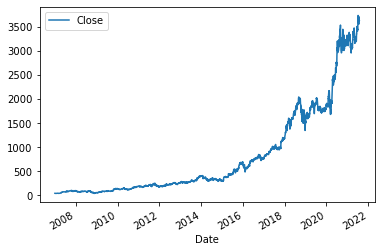

In [166]:
AMZN_close.plot()

In [167]:
# Initialize `side` column for buys and sells
AMZN_close['side'] = np.nan
AMZN_close

,Close,side
Date,,
2007-01-03,38.700001,NaN
2007-01-04,38.900002,NaN
2007-01-05,38.369999,NaN
2007-01-08,37.500000,NaN
2007-01-09,37.779999,NaN
...,...,...
2021-07-22,3638.030029,NaN
2021-07-23,3656.639893,NaN
2021-07-26,3699.820068,NaN


In [168]:
# Initialize variable to hold previous price
previous_price = 0
# Initialize buy and sell list containers
buy = []
sell = []

In [169]:
AMZN_close.head(1)

,Close,side
Date,,
2007-01-03,38.700001,NaN


In [170]:
# Loop through the Pandas DataFrame and initiate a... 
# buy if the previous price is 0, in other words, buy on the first day
# buy if the current day price is less than the previous day price, and
# sell if the current day price is greater than the previous day price, and
# hold if the current day price is equal to the previous day price
for index, row in AMZN_close.iterrows():

    if previous_price == 0:
        AMZN_close.loc[index, "side"] = "buy"
        buy.append(row["Close"])
        AMZN_close.loc[index, "per share profit/loss"] = 0
    elif row["Close"] < previous_price:
        AMZN_close.loc[index, "side"] = "buy"
        buy.append(row["Close"])
        AMZN_close.loc[index, "per share profit/loss"] = 0
    elif row["Close"] > previous_price:
        AMZN_close.loc[index, "side"] = "sell"
        sell.append(row["Close"])
        AMZN_close.loc[index, "per share profit/loss"] = sell[-1] - buy[-1]
    else:
        AMZN_close.loc[index, "side"] = "hold"

    previous_price = row["Close"]

In [262]:
AMZN_close.axes

[DatetimeIndex(['2007-01-03', '2007-01-04', '2007-01-05', '2007-01-08',
                '2007-01-09', '2007-01-10', '2007-01-11', '2007-01-12',
                '2007-01-16', '2007-01-17',
                ...
                '2021-07-15', '2021-07-16', '2021-07-19', '2021-07-20',
                '2021-07-21', '2021-07-22', '2021-07-23', '2021-07-26',
                '2021-07-27', '2021-07-28'],
               dtype='datetime64[ns]', name='Date', length=3668, freq=None),
 Index(['Close', 'side', 'per share profit/loss'], dtype='object')]

In [282]:

# Print the DataFrame
AMZN_close.dtypes
AMZN_close

,Close,side,per share profit/loss
Date,,,
2007-01-03,38.700001,buy,0.000000
2007-01-04,38.900002,sell,0.200001
2007-01-05,38.369999,buy,0.000000
2007-01-08,37.500000,buy,0.000000
2007-01-09,37.779999,sell,0.279999
...,...,...,...
2021-07-22,3638.030029,sell,88.439941
2021-07-23,3656.639893,sell,107.049805
2021-07-26,3699.820068,sell,150.229980


In [284]:
AMZN_S_df[''.datetime()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      20 non-null     object 
 1   positive  20 non-null     float64
 2   neutral   20 non-null     float64
 3   negative  20 non-null     float64
 4   compound  20 non-null     float64
 5   text      20 non-null     object 
 6   Date      20 non-null     object 
dtypes: float64(4), object(3)
memory usage: 1.2+ KB


In [295]:
# AMZN_S_df.date.to_datetime()
AMZN_S_df['date'] =pd.to_datetime(AMZN_S_df['date'])

In [292]:

# AMZN_S_df['Date']= AMZN_S_df['date']
# AMZN_S_df.DateTimeindex()
# print the data frame of SIA
# AMZN_S_df.axes
AMZN_S_df.dtypes
AMZN_S_df = AMZN_S_df.set_index(AMZN_S_df['Date'])

In [296]:
AMZN_S_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 20 entries, 2021-07-21 to 2021-07-26
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      20 non-null     datetime64[ns]
 1   positive  20 non-null     float64       
 2   neutral   20 non-null     float64       
 3   negative  20 non-null     float64       
 4   compound  20 non-null     float64       
 5   text      20 non-null     object        
 6   Date      20 non-null     datetime64[ns]
dtypes: datetime64[ns](2), float64(4), object(1)
memory usage: 1.2+ KB


In [ ]:


# Make empty lists
Buy=[]
Sell=[]
# build for loop

for index, row in AMZN_S_df
    if AMZN_S_df['Compound'] < 1:
        AMZN_S_df.loc[index, 'Compound'] = 'Sell'
        Sell.append(row[''])

In [301]:
# Attach sentiment score to the trading date

Sent_day_comparison = pd.concat([AMZN_S_df, AMZN_close], axis=0, join='left')

# = AMZN_close.merge(AMZN_S_df, right_index = , left_index = True)
# Sent_day_comparison.info()
# AMZN_S_df()
AMZN_close

ValueError: Only can inner (intersect) or outer (union) join the other axis

In [302]:
AMZN_close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3668 entries, 2007-01-03 to 2021-07-28
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Close                  3668 non-null   float64
 1   side                   3668 non-null   object 
 2   per share profit/loss  3661 non-null   float64
dtypes: float64(2), object(1)
memory usage: 243.7+ KB


In [305]:
AMZN_S_df.groupby('D')

KeyError: 'D'

In [180]:
# Average the SIA scores
SIA_df = AMZN_S_df.describe().loc['mean',:].to_frame().T
SIA_df

,positive,neutral,negative,compound
mean,0.0829,0.8871,0.03005,0.234765


In [201]:
SIA_df['Suggestion']= np.nan
SIA_df

,positive,neutral,negative,compound,Suggestion
mean,0.0829,0.8871,0.03005,0.234765,NaN


In [207]:
Buy = []
Sell = []
Threshold = 0

In [216]:
compound_mean

mean    0.234765
Name: compound, dtype: float64

In [215]:
# 


# 
compound_mean = SIA_df.compound
compound_mean
for index, row in compound_mean.iterrows():
    if compound_mean < Threshold:
        SIA_df.loc[index, 'Suggestion'] = 'Sell'
        Sell.append(row['Suggestion'])
    elif compound_mean > Threshold:
        SIA_df.loc[index, 'Suggestion'] = 'Buy'
        Buy.append(row['Suggestion'])
    
#     if previous_price == 0:
#     AMZN_close.loc[index, "side"] = "buy"
#         buy.append(row["Close"])
#         AMZN_close.loc[index, "per share profit/loss"] = 0

AttributeError: 'Series' object has no attribute 'iterrows'

In [186]:
# if the compound score is ls
for compound_individual in AMZN_S_df.compound:
    if compound_individual < compound_mean[0]:
        print('low')
    else:
        print('strong')


low
strong
strong
low
low
strong
strong
low
strong
low
strong
strong
low
low
strong
strong
low
strong
strong
low


In [197]:
print(compound_individual)

0.0772


In [195]:
#labeling the compound results
for compound_label in AMZN_S_df.compound:   
    if compound_label < 0:
        print('Negative')
    elif compound_label == 0:
        print('Neutral')
    elif compound_label > 1:
        print('Positive')

Negative
Neutral
Neutral
Neutral
Neutral
Negative
Neutral
Negative


0.0772

In [196]:
print(compound_label)

0.0772


In [ ]:
# join df
pd.concat()